# Scenarion Analysis

In [1]:
import tenbagger

In [2]:
import os
os.chdir('..')

You can simulate your portfolio growth under different settings. In the following example we simulate for a 10 year period (120 months) the growth of the portfolio when you invest 1000 dollars each month (proportionally) into your portfolio. Under the assumptions that all paid dividends are reinvested back and a stock and dividend growth of 2%.

In [3]:
from tenbagger.src.passiveIncome.calculator import PassiveIncomeCalculator

scenario = PassiveIncomeCalculator('hypothetical_portfolio')
scenario.calulate(n=120, growth_stock=0.02, growth_dividend=0.02, monthly_payment=1000, generate_report=False, only_dividend_stocks=False)
df = scenario.df_report 
df

100%|██████████| 6/6 [00:38<00:00,  6.35s/it]


Yearly divdend: 76.25173267834576
Yearly divdend: 100.87503598419735
Yearly divdend: 127.15754841427298
Yearly divdend: 155.21196159871096
Yearly divdend: 185.15864380517638
Yearly divdend: 217.12616345525694
Yearly divdend: 251.2518483572622
Yearly divdend: 287.6823830925142
Yearly divdend: 326.57444715852057
Yearly divdend: 368.09539665007094
Yearly divdend: 404.58914453837144
Yearly staking rewards: 4498.420623980462


,month,paid_dividends,staking_rewards,total_passive_income,portfolio_value,growth_stock,dividend_growth
0,0,0.000000,52.192880,52.192880,43051.299933,0.02,0.02
0,1,16.979967,53.740331,70.720299,44122.020270,0.02,0.02
0,2,0.000000,55.296837,55.296837,45177.317146,0.02,0.02
0,3,0.000000,56.862450,56.862450,46234.179636,0.02,0.02
0,4,18.358099,58.437224,76.795323,47310.974998,0.02,0.02
...,...,...,...,...,...,...,...
0,116,0.000000,350.851218,350.851218,203316.231198,0.02,0.02
0,117,0.000000,354.150430,354.150430,204670.381667,0.02,0.02
0,118,95.372871,357.469038,452.841908,206123.223615,0.02,0.02
0,119,0.000000,360.807156,360.807156,207484.030810,0.02,0.02


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

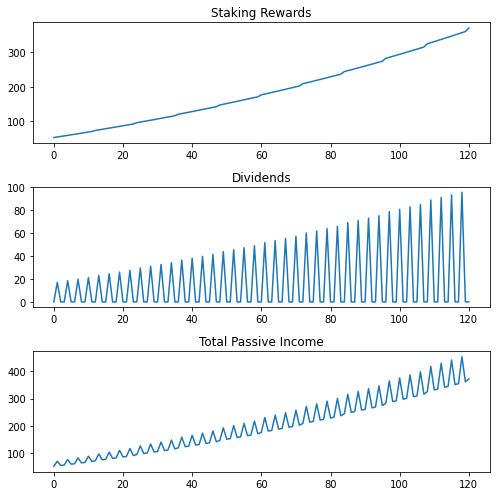

In [5]:
fig, axes = plt.subplots(3, figsize=(7, 7))
titles = ['Staking Rewards', "Dividends", 'Total Passive Income']
cols = ['staking_rewards', 'paid_dividends', 'total_passive_income']

for i, ax in enumerate(axes):
    ax.plot(df.month, df[cols[i]])
    ax.set_title(titles[i])

plt.tight_layout()

Text(0.5, 1.0, 'Portfolio value')

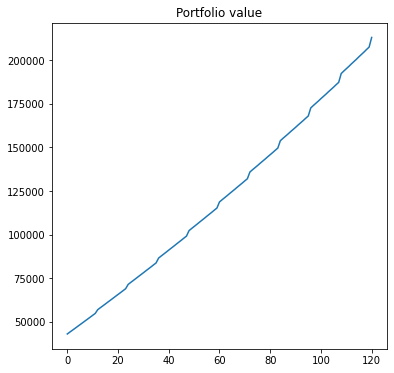

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(df.month, df.portfolio_value)
plt.title("Portfolio value")

We see that with these assumptions your portfolio would have increased from 40,000 to almost 215,000 dollars After 10 years of reinvesting. Also, you would receive almost a 400 dollar passive income.

We can also define a custom portfolio in a dictionary and do a scenario analysis!

In [7]:
# Some other hypothetical portfolio
scenario_2 = PassiveIncomeCalculator({"enb": 100, 'mrk': 100, 'aapl': 100, 'eth-usd': 1})

100%|██████████| 4/4 [00:25<00:00,  6.43s/it]


In [8]:
scenario_2.dist.df

,date,ticker,price,amount,currency,circulatingSupply,type,yield,sector,value,staking_rewards,apy,percentage,dividends,passive_income
0,2021-08-29,aapl,148.600006,100,USD,None,EQUITY,0.0060,Technology,14860.000610,NaN,NaN,50.16%,89.160004,89.160004
0,2021-08-29,mrk,76.290001,100,USD,None,EQUITY,0.0345,Healthcare,7629.000092,NaN,NaN,25.75%,263.200503,263.200503
0,2021-08-29,enb,39.430000,100,USD,None,EQUITY,0.0675,Energy,3943.000031,NaN,NaN,13.31%,266.152502,266.152502
0,2021-08-29,eth-usd,3191.818115,1,USD,117304016,CRYPTOCURRENCY,NaN,Crypto,3191.818115,234.598631,0.0735,10.77%,0.000000,234.598631


In [9]:
scenario_2.calulate(n=120, growth_stock=0.02, growth_dividend=0.02, monthly_payment=1000, generate_report=False, only_dividend_stocks=True)
scenario_2.df_report

Yearly divdend: 723.2059004025317
Yearly divdend: 1046.315323702941
Yearly divdend: 1392.979735121148
Yearly divdend: 1765.183380143808
Yearly divdend: 2165.09135104586
Yearly divdend: 2595.066737991029
Yearly divdend: 3057.689438814483
Yearly divdend: 3555.7767894383214
Yearly divdend: 4092.4061927571256
Yearly divdend: 4670.939941279243
Yearly divdend: 5268.029288620868
Yearly staking rewards: 0.0


,month,paid_dividends,staking_rewards,total_passive_income,portfolio_value,growth_stock,dividend_growth
0,0,0.000000,0,0.000000,27432.000732,0.02,0.02
0,1,96.570354,0,96.570354,28528.571086,0.02,0.02
0,2,56.452020,0,56.452020,29585.023106,0.02,0.02
0,3,0.000000,0,0.000000,30585.023106,0.02,0.02
0,4,108.590848,0,108.590848,31693.613955,0.02,0.02
...,...,...,...,...,...,...,...
0,116,371.256034,0,371.256034,185436.837087,0.02,0.02
0,117,0.000000,0,0.000000,186436.837087,0.02,0.02
0,118,835.826691,0,835.826691,188272.663778,0.02,0.02
0,119,379.766488,0,379.766488,189652.430267,0.02,0.02
